### Comparing Models

Now that you have seen a variety of models for regression and classification problems, it is good to step back and weigh the pros and cons of these options.  In the case of classification models, there are at least three things to consider:

1. Is the model good at handling imbalanced classes?
2. Does the model train quickly?
3. Does the model yield interpretable results?

Depending on your dataset and goals, the importance of these considerations will vary from project to project.  Your goal is to review our models to this point and discuss the pros and cons of each.  Two example datasets are offered as a way to offer two very different tasks where interpretability of the model may be of differing importance.

### Data and Task

Your goal is to discuss the pros and cons of Logistic Regression, Decision Trees, KNN, and SVM for the tasks below.  Consider at least the three questions above and list any additional considerations you believe are important to determining the "best" model for the task.  Share your response with your peers on the class discussion board.  

**TASK 1**: Predicting Customer Churn

Suppose you are tasked with producing a model to predict customer churn.  Which of your classification models would you use and what are the pros and cons of this model for this task?  Be sure to consider interpretability, imbalnced classes, and the speed of training.



In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [53]:
from sklearn.datasets import load_digits

The data is loaded below.  Note that the handwritten digit data is already split into features and target (`digits`, `labels`). 

In [56]:
churn = pd.read_csv('data/telecom_churn.csv')
digits, labels = load_digits(return_X_y=True)

In [58]:
#churn data
churn.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [62]:
# Encode the 'Churn' column to binary values (True/False to 1/0)
churn['Churn'] = churn['Churn'].astype(int)

# Drop non-numerical columns
churn_data_numeric = churn.select_dtypes(include=['float64', 'int64'])

# Drop rows with missing (NaN) values
churn_data_clean = churn_data_numeric.dropna()

# Separate features (X) and target (y)
X = churn_data_clean[['Account length', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge', 'Customer service calls']]
y = churn_data_clean['Churn']

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shapes of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

print(X.head(1))

   Account length  Total day charge  Total eve charge  Total night charge  \
0             128             45.07             16.78               11.01   

   Total intl charge  Customer service calls  
0                2.7                       1  


### Logistic Regression

In [67]:
# Define the Logistic Regression model
log_reg = LogisticRegression(max_iter=2000)

# Hyperparameters to tune
param_grid = [
    {'solver': ['liblinear', 'saga'], 'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]},
    {'solver': ['lbfgs'], 'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10, 100]}
]

# Set up GridSearchCV
grid_search_log_reg = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)

# Fit the model
grid_search_log_reg.fit(X_train, y_train)

# Get the best estimator
best_log_reg = grid_search_log_reg.best_estimator_

# Train and test scores using the best estimator
train_score_log_reg = best_log_reg.score(X_train, y_train)
test_score_log_reg = best_log_reg.score(X_test, y_test)

# Extract the average fit time
average_fit_time_log_reg = grid_search_log_reg.cv_results_['mean_fit_time'][grid_search_log_reg.best_index_]

# Display the results
print(f"Best parameters (Logistic Regression): {grid_search_log_reg.best_params_}")
print(f"Train Score (best estimator): {train_score_log_reg}")
print(f"Test Score (best estimator): {test_score_log_reg}")
print(f"Average Fit Time (best estimator): {average_fit_time_log_reg}")

Best parameters (Logistic Regression): {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
Train Score (best estimator): 0.8563390847711928
Test Score (best estimator): 0.8515742128935532
Average Fit Time (best estimator): 0.004921245574951172


### K Nearest Neighbors

In [69]:
# Define the KNeighborsClassifier model
knn = KNeighborsClassifier()

# Hyperparameters to tune
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Set up GridSearchCV
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)

# Fit the model
grid_search_knn.fit(X_train, y_train)

# Get the best estimator
best_knn = grid_search_knn.best_estimator_

# Train and test scores using the best estimator
train_score_knn = best_knn.score(X_train, y_train)
test_score_knn = best_knn.score(X_test, y_test)

# Extract the average fit time
average_fit_time_knn = grid_search_knn.cv_results_['mean_fit_time'][grid_search_knn.best_index_]

# Display the results
print(f"Best parameters (KNN): {grid_search_knn.best_params_}")
print(f"Train Score (best estimator): {train_score_knn}")
print(f"Test Score (best estimator): {test_score_knn}")
print(f"Average Fit Time (best estimator): {average_fit_time_knn}")

Best parameters (KNN): {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Train Score (best estimator): 0.9103525881470368
Test Score (best estimator): 0.8905547226386806
Average Fit Time (best estimator): 0.0016957759857177735


### Support Vector Machine

In [75]:
# Define the SVC model
svc = SVC()

# Hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2]  # Only relevant for the 'poly' kernel
}

# Set up GridSearchCV
random_search_svc = RandomizedSearchCV(svc, param_grid, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)

# Fit the model
random_search_svc.fit(X_train, y_train)

# Get the best estimator
best_svc = random_search_svc.best_estimator_

# Train and test scores using the best estimator
train_score_svc = best_svc.score(X_train, y_train)
test_score_svc = best_svc.score(X_test, y_test)

# Extract the average fit time
average_fit_time_svc = random_search_svc.cv_results_['mean_fit_time'][random_search_svc.best_index_]

# Display the results
print(f"Best parameters (SVC): {random_search_svc.best_params_}")
print(f"Train Score (best estimator): {train_score_svc}")
print(f"Test Score (best estimator): {test_score_svc}")
print(f"Average Fit Time (best estimator): {average_fit_time_svc}")

Best parameters (SVC): {'kernel': 'rbf', 'gamma': 'auto', 'degree': 2, 'C': 10}
Train Score (best estimator): 0.9294823705926482
Test Score (best estimator): 0.8995502248875562
Average Fit Time (best estimator): 0.1330268383026123


### Decision Tree

In [79]:
# Define the Decision Tree Classifier model
decision_tree = DecisionTreeClassifier()

# Hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Set up GridSearchCV
grid_search_dt = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)

# Fit the model
grid_search_dt.fit(X_train, y_train)

# Get the best estimator
best_dt = grid_search_dt.best_estimator_

# Train and test scores using the best estimator
train_score_dt = best_dt.score(X_train, y_train)
test_score_dt = best_dt.score(X_test, y_test)

# Extract the average fit time
average_fit_time_dt = grid_search_dt.cv_results_['mean_fit_time'][grid_search_dt.best_index_]

# Display the results
print(f"Best parameters (Decision Tree): {grid_search_dt.best_params_}")
print(f"Train Score (best estimator): {train_score_dt}")
print(f"Test Score (best estimator): {test_score_dt}")
print(f"Average Fit Time (best estimator): {average_fit_time_dt}")

Best parameters (Decision Tree): {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2}
Train Score (best estimator): 0.9309827456864216
Test Score (best estimator): 0.8725637181409296
Average Fit Time (best estimator): 0.005399656295776367


### Results

In [81]:
results_df = pd.DataFrame(columns=['model', 'train score', 'test score', 'average fit time'])

results_df = pd.concat([results_df, pd.DataFrame([{
    'model': 'KNN',
    'train score': train_score_knn,
    'test score': test_score_knn,
    'average fit time': average_fit_time_knn
}])], ignore_index=True)

results_df = pd.concat([results_df, pd.DataFrame([{
    'model': 'Logistic Regression',
    'train score': train_score_log_reg,
    'test score': test_score_log_reg,
    'average fit time': average_fit_time_log_reg
}])], ignore_index=True)

results_df = pd.concat([results_df, pd.DataFrame([{
    'model': 'SVC',
    'train score': train_score_svc,
    'test score': test_score_svc,
    'average fit time': average_fit_time_svc
}])], ignore_index=True)

results_df = pd.concat([results_df, pd.DataFrame([{
    'model': 'Decision Tree',
    'train score': train_score_dt,
    'test score': test_score_dt,
    'average fit time': average_fit_time_dt
}])], ignore_index=True)

results_df

/var/folders/7d/4cmb6lbj0pjgcc7xjnw7_mhr0000gn/T/ipykernel_46163/600520657.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([{


,model,train score,test score,average fit time
0,KNN,0.910353,0.890555,0.001696
1,Logistic Regression,0.856339,0.851574,0.004921
2,SVC,0.929482,0.899550,0.133027
3,Decision Tree,0.930983,0.872564,0.005400


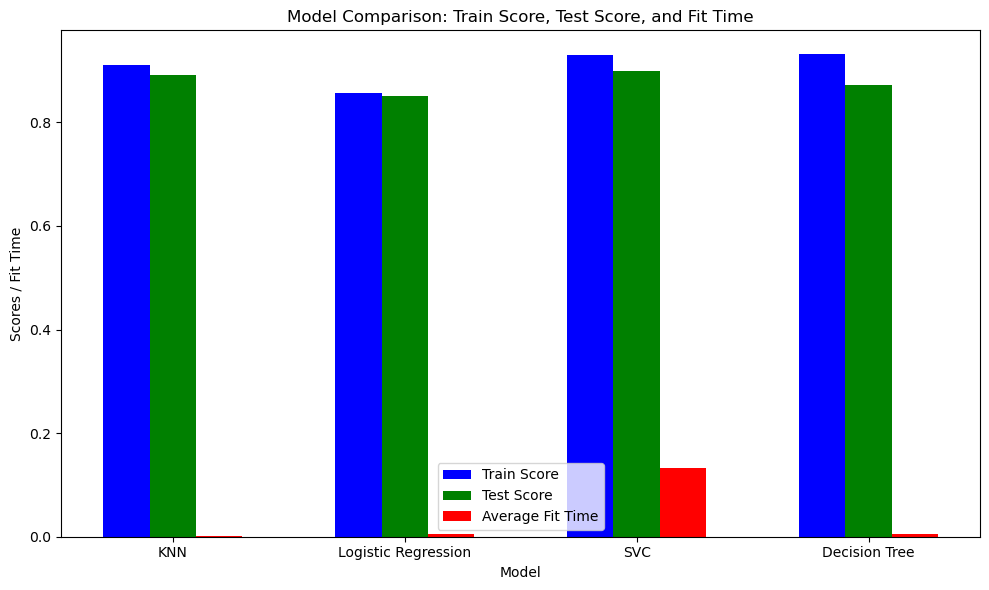

In [83]:
models = results_df['model']
train_scores = results_df['train score']
test_scores = results_df['test score']
fit_times = results_df['average fit time']

# Set up the bar positions for the models
bar_width = 0.2
indices = np.arange(len(models))

# Create the figure and axis for the plot
plt.figure(figsize=(10, 6))

# Plot each of the bars
plt.bar(indices - bar_width, train_scores, width=bar_width, label='Train Score', color='b')
plt.bar(indices, test_scores, width=bar_width, label='Test Score', color='g')
plt.bar(indices + bar_width, fit_times, width=bar_width, label='Average Fit Time', color='r')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Scores / Fit Time')
plt.title('Model Comparison: Train Score, Test Score, and Fit Time')
plt.xticks(indices, models)  # Set the model names as the x-ticks
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

**TASK 2**: Recognizing Handwritten Digits

Suppose you are tasked with training a model to recognize handwritten digits.  Which of your classifier would you use here and why?  Again, be sure to consider the balance of classes, speed of training, and importance of interpretability.



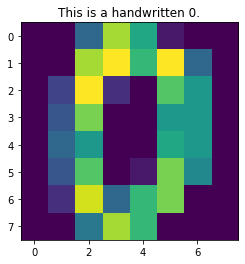

In [7]:
#example image
plt.imshow(digits[0].reshape(8, 8))
plt.title('This is a handwritten 0.');